In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = sns.load_dataset('titanic')
df.head(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False


In [5]:
df.shape

(891, 15)

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='survived', ylabel='count'>

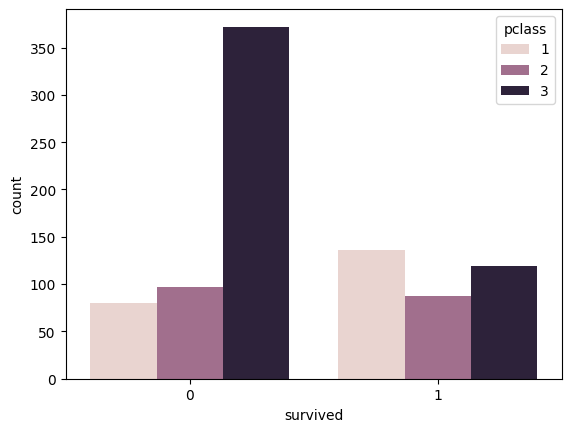

In [17]:
sns.countplot(x=df['survived'], hue=df['pclass'])

In [19]:
df["sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: sex, Length: 891, dtype: object

<Axes: xlabel='survived', ylabel='count'>

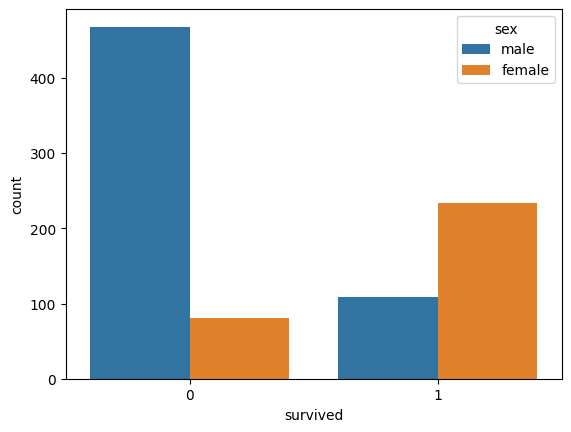

In [22]:
sns.countplot(x=df['survived'], hue=df['sex'])

In [23]:
df.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [24]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['sex']= labelencoder.fit_transform(df['sex'])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
df['sex'], df['survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: sex, Length: 891, dtype: int32,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: survived, Length: 891, dtype: int64)

<Axes: xlabel='sex', ylabel='count'>

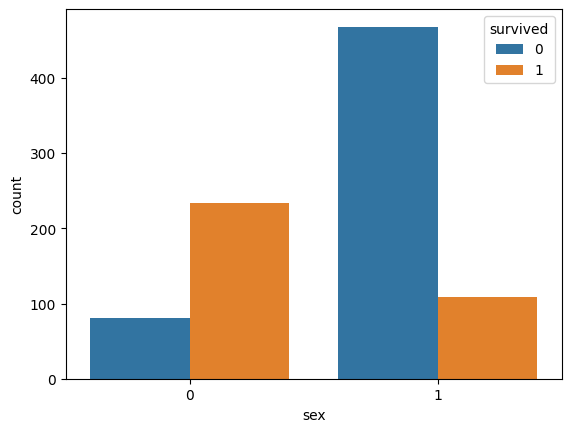

In [27]:
sns.countplot(x=df['sex'], hue=df['survived'])

In [29]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [ ]:
df=df.drop(['age'], axis=1)

In [44]:
df_final = df
df_final.head(10)

,survived,pclass,sex,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,0,0,8.0500,S,Third,man,True,Southampton,no,True
5,0,3,1,0,0,8.4583,Q,Third,man,True,Queenstown,no,True
6,0,1,1,0,0,51.8625,S,First,man,True,Southampton,no,True
7,0,3,1,3,1,21.0750,S,Third,child,False,Southampton,no,False
8,1,3,0,0,2,11.1333,S,Third,woman,False,Southampton,yes,False
9,1,2,0,1,0,30.0708,C,Second,child,False,Cherbourg,yes,False


In [47]:
X= df[['pclass', 'sex']]
Y= df['survived']

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
                                            

In [51]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 0)
log.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [52]:
pred = print(log.predict(X_test))

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [53]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: survived, Length: 179, dtype: int64


In [57]:
import warnings
warnings.filterwarnings("ignore")
res= log.predict([[2,3]])
if(res==0):
  print("So Sorry! Not Survived")
else:
  print("survived")

So Sorry! Not Survived
